##  Description du probleme

### -  Le dataset est celui que nous avons eu à utiliser dans le TP n°2 

* classification des apprenants en deux classes Admin / echec   : Classification 

*  prediction du score des apprenants  Regression

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.errors import ParserError
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

import seaborn as sn
 
from sklearn import metrics


from TP_2_CLASS import DataProcessing

csv_file_name = "scorm_tracking_copy.csv"

# Preview

In [2]:
data = DataProcessing(chemin_fichier_csv=csv_file_name)  # une classe creer dans le TP2

#data est un objet de la class DataProcessing qui contient les methode previsualiser les donnees

-   recuperation du dataset

In [3]:
dataset = data.getDataset()   # return le dataset / la base de donnee

In [4]:
dataset

,id,actor,session_uuid,object_id,activity_type,progression,score,temps,total_ecrans,created,modified,learning_object,processed
0,1,ga2018_umbe@yopmail.com,session-20,694-vorstellung,lesson,1.0,100.0,589.0,8,2016-08-25 17:22:56,2016-08-25 17:32:58,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
1,2,dtic@mobiletic.com,session-33,683-programme-nescens,lesson,1.0,0.0,6194.0,2,2016-08-25 17:27:34,2017-11-02 15:40:38,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
2,3,dtic@mobiletic.com,session-37,678-politique-et-cadre-legal,lesson,1.0,71.0,31203.0,11,2016-08-25 17:27:58,2017-10-27 08:21:30,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
3,4,dtic@mobiletic.com,session-46,671-presentation,lesson,1.0,22.0,112788.0,7,2016-08-25 17:29:27,2017-11-30 16:53:58,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",1
4,5,dtic@mobiletic.com,session-52,684-informatique,lesson,1.0,0.0,841.0,4,2016-08-25 17:30:45,2017-11-02 15:56:02,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27398,245637,dtic@mobiletic.com,dd0de81f-1cfd-4f02-9e99-1fc730e66ccb,691-reseau-developpement,lesson,1.0,0.0,48.0,17,2018-12-13 11:21:20,2018-12-13 11:22:08,"{""location"":""home"",""suspend_data"":""viewed=cdg,...",1
27399,245650,dtic@mobiletic.com,4da3228a-9a0b-42ab-a6ce-d93b2ed99b91,691-reseau-developpement,lesson,1.0,0.0,5.0,17,2018-12-13 11:22:13,2018-12-13 11:22:19,"{""location"":""home"",""suspend_data"":""viewed=cdg,...",1
27400,245654,dtic@mobiletic.com,fcd48e54-b0b9-4ea7-99f2-4189031199fa,724-but-du-module,lesson,1.0,0.0,18.0,1,2018-12-13 11:23:33,2018-12-13 11:23:51,"{""objectives"":[{""id"":""1_introduction"",""progres...",1
27401,245656,dtic@mobiletic.com,a871e8c1-c928-4faf-8cfb-e06f0dbb99bc,724-but-du-module,lesson,1.0,0.0,3.0,1,2018-12-13 11:23:55,2018-12-13 11:23:59,"{""objectives"":[{""id"":""1_introduction"",""progres...",1


In [5]:
# List_module = list(dataset.object_id.unique())
# List_module

*  la colonne object_id n'est pas utilisees dans l'entrainenemt il peut avoir des valeurs null.

In [6]:
data.getListeColonne()

['id',
 'actor',
 'session_uuid',
 'object_id',
 'activity_type',
 'progression',
 'score',
 'temps',
 'total_ecrans',
 'created',
 'modified',
 'learning_object',
 'processed']

In [7]:
data.getStat()

,nb_apprenants,nb_sessions,score_minimal,score_maximal,taux_de_reussite
object_id,,,,,
752-etudes-de-cas-et-questions,123,216,0.0,100.0,99.19
734-risques-psychosociaux,124,153,0.0,100.0,98.39
819-informatique,59,68,0.0,100.0,98.31
755-verhalten-des-mitarbeitenden,94,233,0.0,100.0,97.87
761-fallstudien-und-fragen,89,242,0.0,100.0,97.75
...,...,...,...,...,...
774-ktg-unfall-und-krankheit,88,133,0.0,0.0,0.00
773-familienzulagen,87,105,0.0,0.0,0.00
772-arbeitslosenversicherung,87,95,0.0,0.0,0.00


In [8]:

# data.getModuleActorStat("671-presentation")

*  quelques graphiques

In [9]:
# data.courbeTempsFScoreMax(data.nTopModule(10))

In [10]:
# data.nuagePoint(nom_colonne=['object_id'],agg_dic={'temps':'sum'},x_colonne='taux_de_reussite')

In [11]:
# data.camenbert()

In [12]:
# data.diagrammeEnBaton(data.nTopModule(10),horizontal=True)

* quelques correllations

In [13]:
# # plt.matshow(data.getDataset().corr())
# # plt.show()
# corr = data.getDataset().corr()
# sn.heatmap(corr, cmap="Blues",annot=True,
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values).set(title='Correlation entre toutes les colonnes');
# # data.getDataset()

In [14]:
# corr = data.getStat().corr()
# sn.heatmap(corr, cmap="Blues",annot=True,
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values);
# # data.getDataset()
# # corr
# # data.getStat()

In [15]:
# # on supprime  score_minimal
# corr = data.getStat().drop("score_minimal", axis='columns').corr()
# sn.heatmap(corr, cmap="Blues",annot=True,
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values);
# # data.getStat()
# # corr

In [16]:
# 671-presentation   340 apprenants (c'est le max)

In [17]:
# corr = data.getModuleActorStat("671-presentation").corr()
# sn.heatmap(corr, cmap="Blues",annot=True,
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values);

# # data.getModuleActorStat("671-presentation")

In [18]:
# data.regrouperSelon(col_list=['object_id','actor'],agg_dic={'score':'max','temps':'sum'})

### Pretraitement

In [19]:
dataset = data.regrouperSelon(col_list=['object_id','actor'],agg_dic={'temps':'sum','score':'max','progression':'mean','session_uuid':'count','total_ecrans':'sum'})

dataset = dataset.reset_index() 

* Utilisation de l'objet ColumnTransformer pour le pretraitement de certaines colonnes du dataset sur une échelle de (0, 1)

In [20]:
# Pour la classification
dataset_pour_classification = dataset.drop(['actor'], axis=1)

dataset_pour_classification['score'] = dataset_pour_classification['score'].map(lambda score : 1 if score >= 50 else 0)

ct_cl = ColumnTransformer(
     [("num_preprocess", MinMaxScaler(), ["temps", "progression", "session_uuid", "total_ecrans"])])

In [21]:
# Pour la regression
dataset_pour_regression = dataset.drop(['actor'], axis=1)

ct_rg = ColumnTransformer(
     [("num_preprocess", MinMaxScaler(), ["temps", "score", "progression", "session_uuid", "total_ecrans"])])


# Classification
### Instenciation du model et fixation de l'hyperparamètre 

In [23]:
model_cl = SGDClassifier(verbose=0,
                      learning_rate="optimal", # Hyperparamètre (taux d'apprentissage)
                      random_state=2
                     )

* Separation des données en données d'entrées et target

In [24]:
Y_cl = dataset_pour_classification['score']
X_cl = dataset_pour_classification.drop('score',axis=1)

In [25]:
X_cl_ = pd.DataFrame(ct_cl.fit_transform(X_cl), columns = ["temps", "progression", "session_uuid", "total_ecrans"])

In [26]:
X_cl.drop(X_cl[["temps", "progression", "session_uuid", "total_ecrans"]], axis=1, inplace = True)

In [27]:
X_cl_fl = pd.concat([X_cl, X_cl_], axis = 1)
X_cl_fl

,object_id,temps,progression,session_uuid,total_ecrans
0,632-le-hibou-grand-duc,0.000000,0.330000,0.000000,0.001549
1,669-vallee-trient-finhaut-source-de-bien-etre,0.000040,0.070000,0.000000,0.010070
2,671-presentation,1.000000,0.989011,1.000000,0.492641
3,671-presentation,0.003137,1.000000,0.022222,0.015492
4,671-presentation,0.011050,0.856667,0.055556,0.031758
...,...,...,...,...,...
15408,828-quiz,0.018108,0.753333,0.022222,0.036406
15409,828-quiz,0.007153,0.502500,0.033333,0.048799
15410,828-quiz,0.010020,0.606364,0.355556,0.408211
15411,828-quiz,0.006899,1.000000,0.000000,0.011619


In [28]:
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_cl_fl, Y_cl, random_state=2, train_size = .80)

In [29]:
X_train_cl = X_train_cl.to_numpy()
y_train_cl = y_train_cl.to_numpy()

In [30]:
X_test_cl = X_test_cl.to_numpy()
y_test_cl = y_test_cl.to_numpy()

## Critère d'optimisation et Méthode d'optimisation

*  recherche de Alpha (optimal) : paramètre utiliser pour la regularisation et aussi utiliser dans le calcul de l'hyper parametre (learning rate)

* Pipeline and GridSearchCV methods

In [31]:
pipe_ = make_pipeline(OneHotEncoder(handle_unknown='ignore'), model_cl)
print(pipe_)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('sgdclassifier', SGDClassifier(random_state=2))])


In [32]:
parameters_cl = {'sgdclassifier__alpha':np.logspace(-5, 1, 60)}

In [33]:
GridSearchCV_cl = GridSearchCV(pipe_, parameters_cl, cv = 7, n_jobs = -1)

In [34]:
# dir(GridSearchCV_cl)

In [35]:
GridSearchCV_cl.fit(X_train_cl, y_train_cl)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(handle_unknown='ignore')),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=2))]),
             n_jobs=-1,
             param_grid={'sgdclassifier__alpha': array([1.00000000e-05, 1.26384820e-05, 1.59731228e-05, 2.01876025e-05,
       2.55140652e-05, 3.22459055e-05, 4.07539297e-05, 5.15067808e-05,
       6.50967523e-05, 8.22724134e-...
       4.58159767e-02, 5.79044398e-02, 7.31824222e-02, 9.24914728e-02,
       1.16895182e-01, 1.47737765e-01, 1.86718109e-01, 2.35983347e-01,
       2.98247129e-01, 3.76939098e-01, 4.76393801e-01, 6.02089449e-01,
       7.60949669e-01, 9.61724871e-01, 1.21547425e+00, 1.53617495e+00,
       1.94149195e+00, 2.45375111e+00, 3.10116893e+00, 3.91940677e+00,
       4.95353521e+00, 6.26051657e+00, 7.91234262e+00, 1.00000000e+01])})

In [36]:
print(GridSearchCV_cl.best_params_)

{'sgdclassifier__alpha': 0.000103979841848149}


In [37]:
print(GridSearchCV_cl.best_score_)

0.9379564823007404


In [38]:
print(GridSearchCV_cl.best_estimator_)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.000103979841848149, random_state=2))])


In [39]:
New_model_cl = GridSearchCV_cl.best_estimator_

In [40]:
New_model_cl.score(X_test_cl, y_test_cl)

0.9438858254946481

In [41]:
# Pour les données d'entrainement
tmp_train_predict = New_model_cl.predict(X_train_cl)
cl_confusion_matrix = metrics.confusion_matrix(y_train_cl,tmp_train_predict) #Calculer la matrice de confusion pour évaluer la précision d'un classifieur.

#

# Pour les données de test
tmp_test_predict = New_model_cl.predict(X_test_cl) # Prediction
cl_confusion_matrix_test = metrics.confusion_matrix(y_test_cl,tmp_test_predict) #Calculer la matrice de confusion pour évaluer la précision d'un classifieur.

In [43]:
# Affichage des metrics de classification pour les données d'entrainement
cl_classification_report = metrics.classification_report(y_train_cl,tmp_train_predict,target_names=['echec','Admin'])

print(cl_classification_report)

              precision    recall  f1-score   support

       echec       1.00      0.88      0.94      5369
       Admin       0.92      1.00      0.96      6961

    accuracy                           0.95     12330
   macro avg       0.96      0.94      0.95     12330
weighted avg       0.95      0.95      0.95     12330



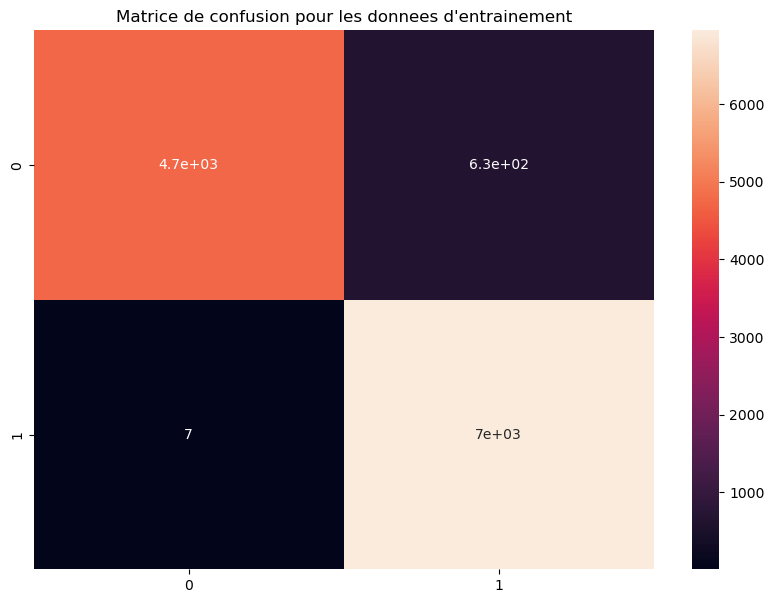

In [44]:
plt.figure(figsize = (10,7))
plt.title("Matrice de confusion pour les donnees d'entrainement")
sn.heatmap(cl_confusion_matrix, annot=True);

In [45]:
# Affichage des metrics de classification pour les données de test
cl_classification_report_test = metrics.classification_report(y_test_cl,tmp_test_predict,target_names=['echec','Admin'])

print(cl_classification_report_test)

              precision    recall  f1-score   support

       echec       0.99      0.87      0.93      1302
       Admin       0.91      1.00      0.95      1781

    accuracy                           0.94      3083
   macro avg       0.95      0.93      0.94      3083
weighted avg       0.95      0.94      0.94      3083



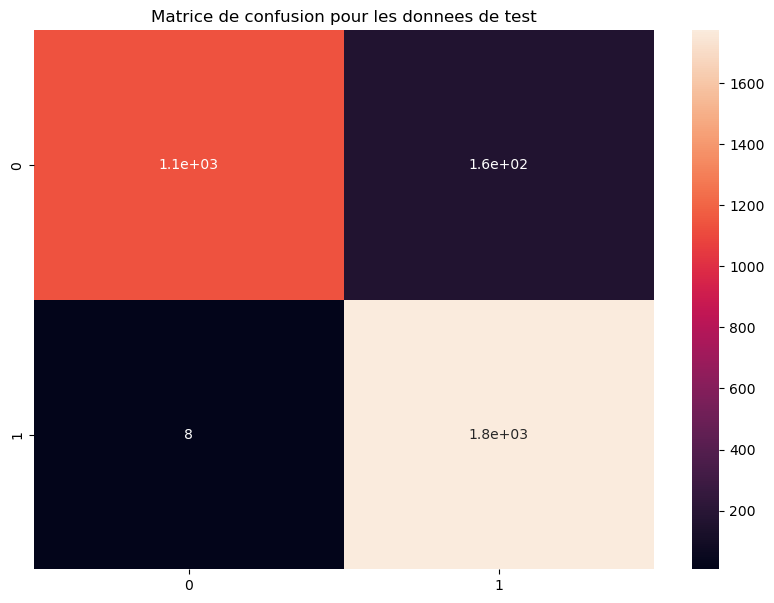

In [46]:
plt.figure(figsize = (10,7))
plt.title("Matrice de confusion pour les donnees de test")
sn.heatmap(cl_confusion_matrix_test, annot=True);

# Regression

### Instenciation du model et fixation de l'hyperparamètre 

* L'hyperparamètre est le taux d'apprentissage (learning_rate)

In [47]:
model_rg = SGDRegressor(loss='squared_error',random_state=10,learning_rate="constant")

In [48]:
regression = pd.DataFrame(ct_rg.fit_transform(dataset_pour_regression), 
                                       columns = ["temps", "score", "progression", "session_uuid", "total_ecrans"])

In [49]:
dataset_pour_regression.drop(dataset_pour_regression[["temps", "score", "progression", "session_uuid", "total_ecrans"]],
                             axis=1, inplace = True)

In [50]:
dataset_pour_regression_fl = pd.concat([dataset_pour_regression, regression], axis = 1)
dataset_pour_regression_fl

,object_id,temps,score,progression,session_uuid,total_ecrans
0,632-le-hibou-grand-duc,0.000000,0.00,0.330000,0.000000,0.001549
1,669-vallee-trient-finhaut-source-de-bien-etre,0.000040,0.00,0.070000,0.000000,0.010070
2,671-presentation,1.000000,0.22,0.989011,1.000000,0.492641
3,671-presentation,0.003137,1.00,1.000000,0.022222,0.015492
4,671-presentation,0.011050,1.00,0.856667,0.055556,0.031758
...,...,...,...,...,...,...
15408,828-quiz,0.018108,0.02,0.753333,0.022222,0.036406
15409,828-quiz,0.007153,0.42,0.502500,0.033333,0.048799
15410,828-quiz,0.010020,0.29,0.606364,0.355556,0.408211
15411,828-quiz,0.006899,0.85,1.000000,0.000000,0.011619


* Separation des données en données d'entrées et target

In [51]:

Y_rg = dataset_pour_regression_fl['score']
X_rg = dataset_pour_regression_fl.drop('score',axis=1)

In [52]:
X_train_rg, X_test_rg, y_train_rg, y_test_rg = train_test_split(X_rg, Y_rg, random_state=2, train_size = .80)

### Critère d'optimisation et méthode d'optimisation

* Pipeline and GridSearchCV methods

In [53]:
X_train_rg_p = X_train_rg.to_numpy()
y_train_rg_p = y_train_rg.to_numpy()

In [54]:
X_test_rg_p = X_test_rg.to_numpy()
y_test_rg_p = y_test_rg.to_numpy()

In [55]:
pipe__ = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'), 
    model_rg
)
print(pipe__)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('sgdregressor',
                 SGDRegressor(learning_rate='constant', random_state=10))])


In [56]:
parameters_rg = {'sgdregressor__alpha':np.logspace(-5, 1, 60)}

In [57]:
GridSearchCV_rg = GridSearchCV(pipe__, parameters_rg, cv = 7, n_jobs = -1)

In [58]:
GridSearchCV_rg.fit(X_train_rg_p, y_train_rg_p)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(handle_unknown='ignore')),
                                       ('sgdregressor',
                                        SGDRegressor(learning_rate='constant',
                                                     random_state=10))]),
             n_jobs=-1,
             param_grid={'sgdregressor__alpha': array([1.00000000e-05, 1.26384820e-05, 1.59731228e-05, 2.01876025e-05,
       2.55140652e-05, 3.22459055e-05, 4.07539297e-05, 5.15067808e-05,
       6.50...
       4.58159767e-02, 5.79044398e-02, 7.31824222e-02, 9.24914728e-02,
       1.16895182e-01, 1.47737765e-01, 1.86718109e-01, 2.35983347e-01,
       2.98247129e-01, 3.76939098e-01, 4.76393801e-01, 6.02089449e-01,
       7.60949669e-01, 9.61724871e-01, 1.21547425e+00, 1.53617495e+00,
       1.94149195e+00, 2.45375111e+00, 3.10116893e+00, 3.91940677e+00,
       4.95353521e+00, 6.26051657e+00, 7.91234262e

In [59]:
print(GridSearchCV_rg.best_params_)

{'sgdregressor__alpha': 1e-05}


In [60]:
print(GridSearchCV_rg.best_score_)

0.7783983966974459


In [61]:
print(GridSearchCV_rg.best_estimator_)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('sgdregressor',
                 SGDRegressor(alpha=1e-05, learning_rate='constant',
                              random_state=10))])


In [62]:
New_model_rg = GridSearchCV_rg.best_estimator_

In [63]:
New_model_rg.score(X_test_rg_p, y_test_rg_p)

0.7938340462900438

In [64]:
# Calcul de metrics pour les données d'entrainement 
rg_score_train = New_model_rg.score(X_train_rg_p,y_train_rg_p)
rg_tmp_train_predict = New_model_rg.predict(X_train_rg_p)

rg_mean_squared_error_train = metrics.mean_squared_error(y_train_rg_p,rg_tmp_train_predict)

#

# Calcul de metrics pour les données de test
rg_score_test = New_model_rg.score(X_test_rg_p,y_test_rg_p)
rg_tmp_test_predict_test = New_model_rg.predict(X_test_rg_p)

rg_mean_squared_error_test = metrics.mean_squared_error(y_test_rg_p,rg_tmp_test_predict_test)

label_rg  =       ['score','mean_squared_error']
valeur_train_rg = [rg_score_train,rg_mean_squared_error_train]
valeur_test_rg = [rg_score_test,rg_mean_squared_error_test]
valeur_train_rg, valeur_test_rg

([0.816861285861509, 0.03727705860973429],
 [0.7938340462900438, 0.04206316552322927])

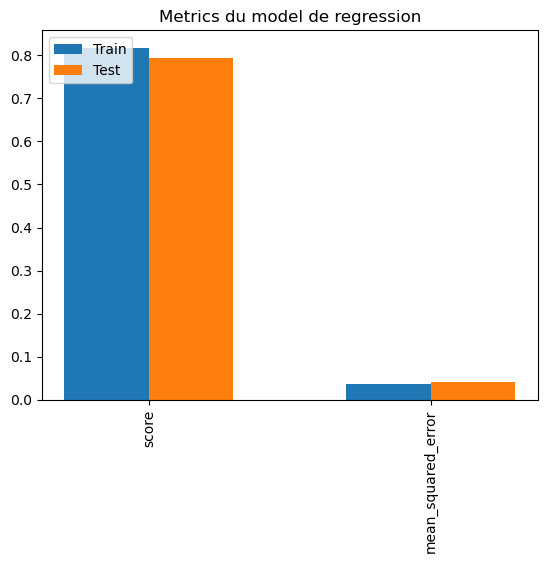

In [65]:
largeur_barre_rg = 0.3
position_train = [i for i in range(len(valeur_train_rg))]
position_test = [i + largeur_barre_rg  for i in range(len(valeur_test_rg))]


plt.xticks([r + largeur_barre_rg / 2 for r in range(len(valeur_train_rg))], label_rg)


plt.xticks(rotation= 'vertical')
plt.bar(position_train,valeur_train_rg   ,width=largeur_barre_rg)
plt.bar(position_test,valeur_test_rg ,width=largeur_barre_rg)
plt.legend(['Train','Test'],loc=2)
plt.title("Metrics du model de regression");

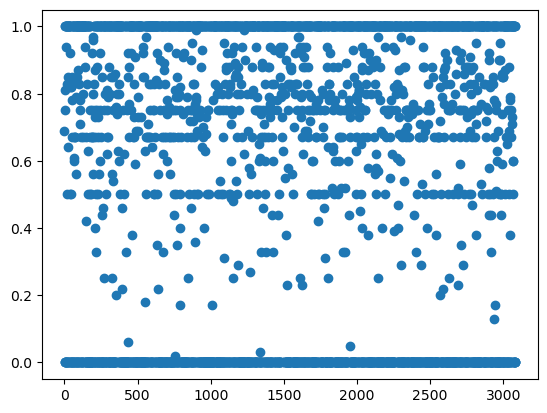

In [66]:
plt.scatter([i for i in range(len(y_test_rg_p))],  y_test_rg_p);

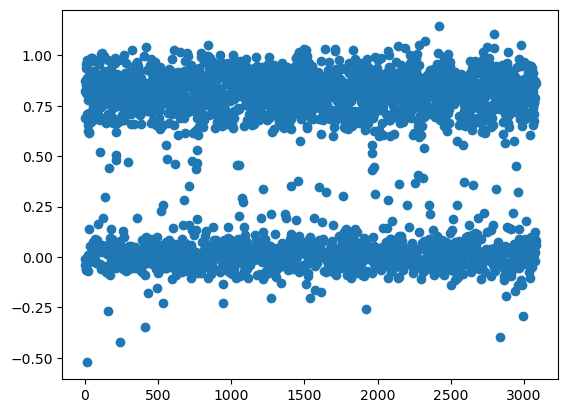

In [67]:
plt.scatter([i for i in range(len(rg_tmp_test_predict_test))],  rg_tmp_test_predict_test);